In [1]:
import numpy as np

# Chapter 2: Visualizing Gradient Descent

Now that you've learned how gradient descent works, it's time to put your knowledge into action :-)

We're generating a new synthetic dataset using *b = 0.5* and *w = -3* for a **linear regression with a single feature (x)**:

$$
\Large
y = b + w x
$$

You'll implement the **five steps** of gradient descent in order to **learn these parameters** from the data.

## Data Generation

In [2]:
true_b = .5
true_w = -3
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

## Step 0: Random Initialization

The first step - actually, the zeroth step - is the *random initialization* of the parameters. Using Numpy's `random.randn` method, you should write code to initialize both *b* and *w*:

In [6]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)

b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

The first step (for real) is the **forward pass**, that is, the **predictions** of the model. Our model is a linear regression with a single feature (x), and its parameters are *b* and *w*. You should write code to generate predictions (yhat):

In [8]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train
# print(yhat)

## Step 2: Compute the Mean Squared Error (MSE) Loss

Since our model is a linear regression, the appropriate loss is the **Mean Squared Error (MSE)** loss:

$$
\Large
error_i = \hat{y_i} - y_i
\\
\Large
loss = \frac{1}{N}\sum_{i=0}^N{error_i^2}
$$

For each data point (i) in our training set, you should write code to compute the difference between the model's predictions (yhat) and the actual values (y_train), and use the errors of all N data points to compute the loss:

Obs.: DO NOT use loops!

In [9]:
error = yhat - y_train
loss = (np.sum(error ** 2)) / N
print(loss)

2.0704460143495793


## Step 3: Compute the Gradients

PyTorch's autograd will take care of that later on, so we don't have to compute any derivatives yourself! So, no need to manually implement this step.

You *still* should understand what the gradients *mean*, though.

In [10]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = 2 * error.mean()
w_grad = 2 * (x_train * error).mean()
print(b_grad, w_grad)

2.679778098084119 1.8086169444604727


The gradients above indicate that:
- for a tiny increase in the value of the parameter *b*, the loss will increase roughly 2.7 times as much
- for a tiny increase in the value of the parameter *w*, the loss will increase roughly 1.8 times as much

## Step 4: Update the Parameters

The fourth step is the **parameter update** - you should write code that use the gradients and a learning rate (set to 0.1) to update the parameters:

In [11]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

# Step 4 - Updates parameters using gradients and the 
# learning rate
b = b - lr * b_grad
w = w - lr * w_grad
print(b, w)

[0.22873634] [-0.319126]


## Step 5: Rinse and Repeat!

The last step consists of putting the other steps together and organize them inside a loop. Write code to fill in the blanks in the loop below:

In [15]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)

b = np.random.randn(1)
w = np.random.randn(1)

lr = 0.1
all_losses = []
for epoch in range(1000):
    # Step 1: Forward pass
    yhat = b + w * x_train
    
    # Step 2: Compute MSE loss
    error = yhat - y_train
    loss = (np.sum(error ** 2)) / N
    print("Loss at epoch {}: {}".format(epoch, loss))
    all_losses.append(loss)
    # Step 3: Compute the gradients
    b_grad = 2 * error.mean()
    w_grad = 2 * (x_train * error).mean()

    # Step 4: Update the parameters
    b = b - lr * b_grad
    w = w - lr * w_grad
    
# print(b, w)
# print(loss)

Loss at epoch 0: 2.0704460143495793
Loss at epoch 1: 1.3366443021844985
Loss at epoch 2: 0.9170829190650736
Loss at epoch 3: 0.675235486186904
Loss at epoch 4: 0.5339511488690881
Loss at epoch 5: 0.4496302838575471
Loss at epoch 6: 0.3976320616609839
Loss at epoch 7: 0.3640287501039962
Loss at epoch 8: 0.34094634663019263
Loss at epoch 9: 0.32393172370236223
Loss at epoch 10: 0.3104648882682
Loss at epoch 11: 0.29911830652962695
Loss at epoch 12: 0.28908186351533494
Loss at epoch 13: 0.27989443060372077
Loss at epoch 14: 0.2712921803015046
Loss at epoch 15: 0.26312287103821763
Loss at epoch 16: 0.2552974094742673
Loss at epoch 17: 0.24776247715801678
Loss at epoch 18: 0.2404850600187391
Loss at epoch 19: 0.23344370383191745
Loss at epoch 20: 0.22662357038406186
Loss at epoch 21: 0.2200136413619761
Loss at epoch 22: 0.21360513592388342
Loss at epoch 23: 0.20739061415429522
Loss at epoch 24: 0.20136346815957723
Loss at epoch 25: 0.19551763227503463
Loss at epoch 26: 0.1898474171513153
Lo

Congratulations! Your model is able to learn both *b* and *w* that are **really close** to their true values. They will never be a perfect match, though, because of the *noise* we added to the synthetic data (and that's always present in real world data!).

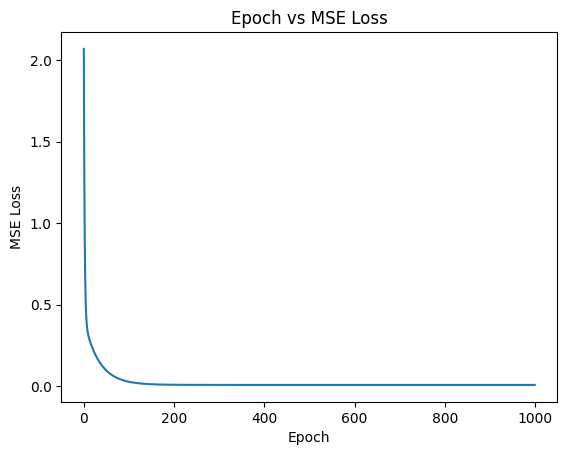

In [16]:
### Plot epoch vs loss
import matplotlib.pyplot as plt
plt.plot(all_losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Epoch vs MSE Loss")
plt.show()